## Group No 2

## Group Member Name: SHOBIKA R

# 1. Import the required libraries

In [ ]:
!pip install keras-tuner
# !pip install tensorflow-datasets
import tensorflow as tf
import pandas
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import pathlib
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.initializers import HeNormal
import kerastuner as kt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 1.9 MB/s eta 0:00:00


<ipython-input-2-08332ef3fe7d>:10: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


# 2. Data Acquisition  -- Score: 0.5 Mark

For the problem identified by you, students have to find the data source themselves from any data source.

Data Source:Dataset: Classify the flowers.
https://www.tensorflow.org/datasets/catalog/tf_flowers

## 2.1 Code for converting the above downloaded data into a form suitable for DL

In [ ]:
##---------Type the code below this line------------------##
dataset, info = tfds.load("tf_flowers", split="train", with_info=True)
print(info)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='tf_flowers',
    full_name='tf_flowers/3.0.1',
    description="""
    A large set of images of flowers
    """,
    homepage='https://www.tensorflow.org/tutorials/load_data/images',
    data_path='/root/tensorflow_datasets/tf_flowers/3.0.1.incompleteBQC8I7',
    file_format=tfrecord,
    download_size=218.21 MiB,
    dataset_size=221.83 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=5),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=3670, num_shards=2>,
    },
    citation="""@ONLINE {tfflowers,
    author = "The TensorFlow Team",
    title = "Flowers",
    month = "jan",
    year = "2019",
    url = "http://download.tensorflow.org/exam

In [ ]:
num_classes = info.features['label'].num_classes
print(num_classes)
class_names = np.array(info.features['label'].names)
print(class_names)

5
['dandelion' 'daisy' 'tulips' 'sunflowers' 'roses']


In [ ]:
#Count No of images in each classes
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)
class_names = [item.name for item in data_dir.glob('*')]
for class_name in class_names:
    class_path = data_dir / class_name
    num_images = len(list(class_path.glob('*')))
    print(f"Class: {class_name}, Number of Images: {num_images}")

228813984/228813984 [==============================] - 2s 0us/step
Class: sunflowers, Number of Images: 699
Class: dandelion, Number of Images: 898
Class: tulips, Number of Images: 799
Class: LICENSE.txt, Number of Images: 0
Class: daisy, Number of Images: 633
Class: roses, Number of Images: 641


## 2.1 Write your observations from the above.

1. Size of the dataset
2. What type of data attributes are there?
3. What are you classifying?
4. Plot the distribution of the categories of the target / label.



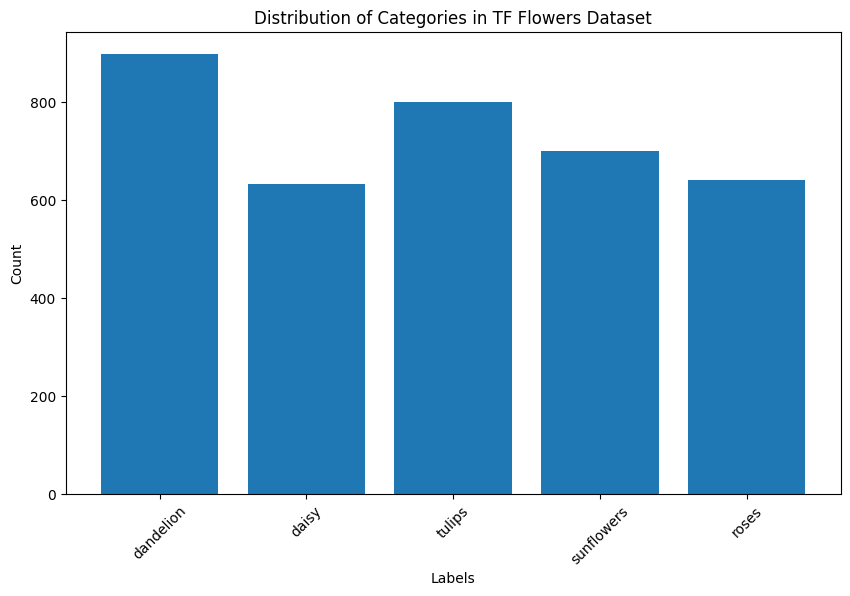

In [ ]:
class_names = info.features['label'].names

# Initialize a dictionary to store label counts
label_counts = {class_name: 0 for class_name in class_names}

# Collect label counts from the dataset
for obj in dataset:
    label_name = class_names[obj['label'].numpy()]
    label_counts[label_name] += 1

# Extract label names and counts
labels = list(label_counts.keys())
counts = list(label_counts.values())

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(labels, counts)
plt.xlabel("Labels")
plt.ylabel("Count")
plt.title("Distribution of Categories in TF Flowers Dataset")
plt.xticks(rotation=45)
plt.show()

# 3. Data Preparation -- Score: 1 Mark

Perform the data prepracessing that is required for the data that you have downloaded.


This stage depends on the dataset that is used.

## 3.1 Apply pre-processing techiniques

* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies
* Encode categorical data
* Normalize the data
* Feature Engineering
* Stop word removal, lemmatiation, stemming, vectorization


IF ANY

In [ ]:
##---------Type the code below this line------------------##

data=pandas.DataFrame(dataset)
null_check = data.isnull()
print(null_check)

      image  label
0     False  False
1     False  False
2     False  False
3     False  False
4     False  False
...     ...    ...
3665  False  False
3666  False  False
3667  False  False
3668  False  False
3669  False  False

[3670 rows x 2 columns]


## 3.2 Identify the target variables.

* Separate the data front the target such that the dataset is in the form of (X,y) or (Features, Label)

* Discretize / Encode the target variable or perform one-hot encoding on the target or any other as and if required.


In [ ]:
##---------Type the code below this line------------------##
images = []
labels = []

# Define the target image size
target_image_size = (128, 128)

# Collect images and labels from the dataset
for obj in dataset:
    image = tf.image.resize(obj['image'], target_image_size)
    label = obj['label']
    images.append(image)
    labels.append(label)

# Convert the lists to TensorFlow tensors
images = tf.convert_to_tensor(images)
labels = tf.convert_to_tensor(labels)

# Perform one-hot encoding on the labels
labels = tf.one_hot(labels, depth=len(info.features['label'].names))

# Create feature-label pairs (X, y)
X = images
y = labels

# Verify the shapes
print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (3670, 128, 128, 3)
y shape: (3670, 5)


## 3.3 Split the data into training set and testing set

In [ ]:
(training_set, validation_set,testing_set), dataset_info = tfds.load(
    'tf_flowers',
    split=['train[:70%]', 'train[80%:]','train[60%:]'],
    with_info=True,
    as_supervised=True,)



num_training_examples = 0
num_validation_examples = 0
num_testing_examples=0
for example in training_set:
    num_training_examples += 1
for example in validation_set:
    num_validation_examples += 1
for example in testing_set:
    num_testing_examples += 1
print('Total Number of Classes: {}'.format(num_classes))
print('Total Number of Training Images: {}'.format(num_training_examples))
print('Total Number of Validation Images: {}'.format(num_validation_examples))
print('Total Number of Testing Images: {} \n'.format(num_testing_examples))

Total Number of Classes: 5
Total Number of Training Images: 2569
Total Number of Validation Images: 734
Total Number of Testing Images: 1468 



In [ ]:
preprocess_input = tf.keras.applications.resnet.preprocess_input
training_set = (training_set.map(lambda x, y: (preprocess_input(x), y))
)
AUTOTUNE = tf.data.AUTOTUNE
training_set = training_set.prefetch(buffer_size=AUTOTUNE)
for i, example in enumerate(training_set.take(3)):
  print('Image {} shape: {} label: {}'.format(i+1, example[0].shape, example[1]))



Image 1 shape: (333, 500, 3) label: 2
Image 2 shape: (212, 320, 3) label: 3
Image 3 shape: (240, 320, 3) label: 3


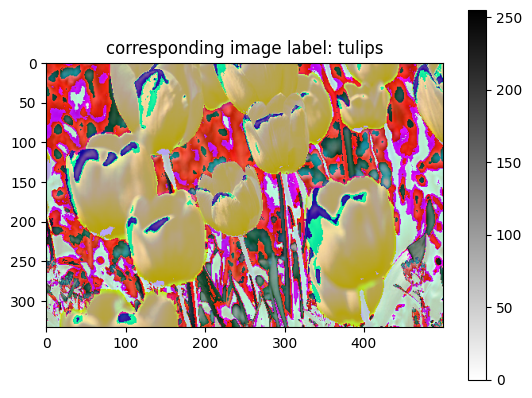

In [ ]:
for image, label in training_set.take(1):
  break
image = image.numpy()
plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.title('corresponding image label: {}'.format(class_names[label]))
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
IMAGE_RES = 224
def format_image(image, label):
    image = tf.image.resize(image, (IMAGE_RES, IMAGE_RES))/255.0
    return image, label
BATCH_SIZE = 32
train_batches = training_set.shuffle(num_training_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
validation_batches = validation_set.map(format_image).batch(BATCH_SIZE).prefetch(1)
test_batches = testing_set.shuffle(num_testing_examples//4).map(format_image).batch(BATCH_SIZE).prefetch(1)
print(train_batches)
print(validation_batches)


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>


## 3.4 Preprocessing report

Mention the method adopted  and justify why the method was used
* to remove duplicate data, if present
* to impute or remove missing data, if present
* to remove data inconsistencies, if present
* to encode categorical data
* the normalization technique used


# 4. Deep Neural Network Architecture - Score:  Marks

## 4.1 Design the architecture that you will be using

* Sequential Model Building with Activation for each layer.
* Add dense layers, specifying the number of units in each layer and the activation function used in the layer.
* Use Relu Activation function in each hidden layer
* Use Sigmoid / softmax Activation function in the output layer as required

DO NOT USE CNN OR RNN.

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224, 224, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # 5 classes in the Flowers dataset
])

## 4.2 DNN Report

Report the following and provide justification for the same.

* Number of layers
* Number of units in each layer
* Total number of trainable parameters



# 5. Training the model - Score: 1 Mark

## 5.1 Configure the training

Configure  the model for training, by using appropriate optimizers and regularizations

Compile with categorical CE loss and metric accuracy.

In [ ]:
##---------Type the code below this line------------------##
sgd_optimizer = tf.keras.optimizers.SGD(
        learning_rate=hp.Choice('learning_rate', values=[0.01, 0.001, 0.0001])
    )
model.compile(
  optimizer=sgd_optimizer,
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 1024)              154141696 
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)               1

## 5.2 Train the model

Train Model with cross validation, with total time taken shown for 20 epochs.

Time taken for 20 epochs: Approximately 1hr

Use SGD.

In [ ]:
EPOCHS = 50
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5714: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


81/81 [==============================] - 264s 3s/step - loss: 1.6144 - accuracy: 0.2273 - val_loss: 1.5901 - val_accuracy: 0.2398
Epoch 2/50
81/81 [==============================] - 249s 3s/step - loss: 1.5313 - accuracy: 0.2962 - val_loss: 1.4900 - val_accuracy: 0.3147
Epoch 3/50
81/81 [==============================] - 247s 3s/step - loss: 1.4649 - accuracy: 0.3422 - val_loss: 1.4251 - val_accuracy: 0.3760
Epoch 4/50
81/81 [==============================] - 258s 3s/step - loss: 1.3889 - accuracy: 0.3752 - val_loss: 1.3262 - val_accuracy: 0.4169
Epoch 5/50
81/81 [==============================] - 244s 3s/step - loss: 1.3276 - accuracy: 0.4227 - val_loss: 1.3106 - val_accuracy: 0.4114
Epoch 6/50
81/81 [==============================] - 253s 3s/step - loss: 1.2986 - accuracy: 0.4243 - val_loss: 1.2880 - val_accuracy: 0.4550
Epoch 7/50
81/81 [==============================] - 244s 3s/step - loss: 1.2802 - accuracy: 0.4371 - val_loss: 1.3788 - val_accuracy: 0.3719
Epoch 8/50
81/81 [======

Justify your choice of optimizers and regulizations used and the hyperparameters tuned

In [ ]:



tuner = kt.Hyperband(
    model,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='keras_tuner_dir',
    project_name='tf_flowers'
)
tuner.search(train_batches, epochs=10, validation_data=validation_batches)
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.hypermodel.build(best_hps)



# 6. Test the model - 0.5 marks

In [ ]:
class_names = np.array(dataset_info.features['label'].names)
print(class_names)

['dandelion' 'daisy' 'tulips' 'sunflowers' 'roses']


In [ ]:
image_batch, label_batch = next(iter(train_batches))
image_batch = image_batch.numpy()
label_batch = label_batch.numpy()
predicted_batch = model.predict(image_batch)
predicted_batch = tf.squeeze(predicted_batch).numpy()
predicted_ids = np.argmax(predicted_batch, axis=-1)
predicted_class_names = class_names[predicted_ids]
print(predicted_class_names)

1/1 [==============================] - 0s 500ms/step
['dandelion' 'sunflowers' 'sunflowers' 'dandelion' 'dandelion' 'dandelion'
 'dandelion' 'dandelion' 'tulips' 'sunflowers' 'dandelion' 'daisy'
 'sunflowers' 'tulips' 'daisy' 'tulips' 'dandelion' 'daisy' 'dandelion'
 'roses' 'tulips' 'sunflowers' 'tulips' 'dandelion' 'dandelion'
 'sunflowers' 'tulips' 'tulips' 'tulips' 'roses' 'roses' 'tulips']


In [ ]:
print("Labels:           ", label_batch)
print("Predicted labels: ", predicted_ids)

Labels:            [0 0 3 3 0 0 0 0 2 3 2 0 3 2 1 2 0 1 0 4 2 3 2 0 0 3 2 2 2 4 4 2]
Predicted labels:  [0 3 3 0 0 0 0 0 2 3 0 1 3 2 1 2 0 1 0 4 2 3 2 0 0 3 2 2 2 4 4 2]


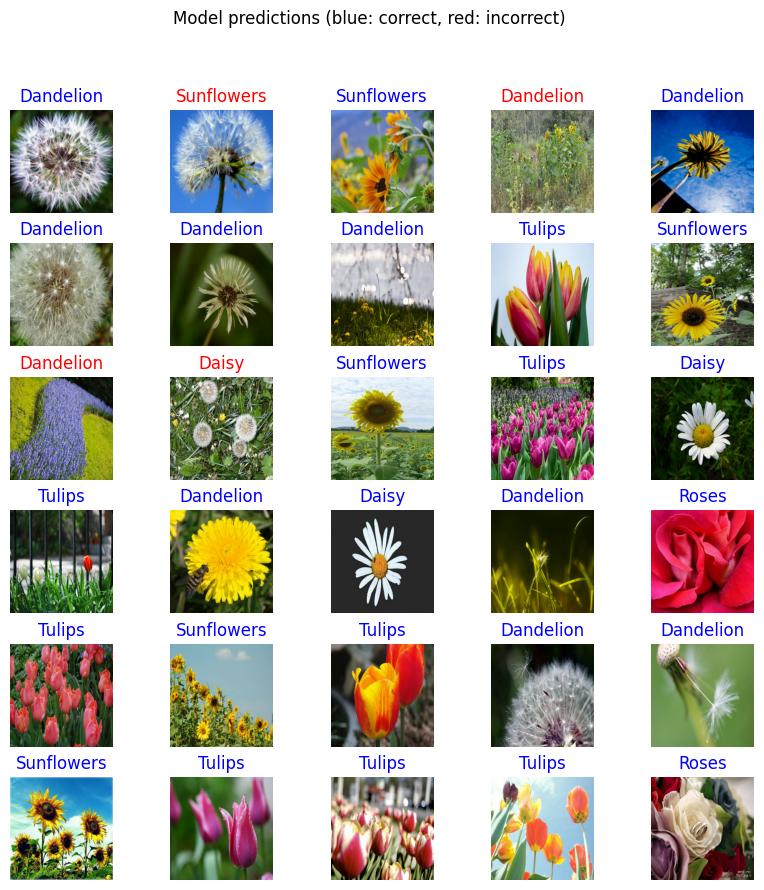

In [ ]:
##---------Type the code below this line------------------##
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for n in range(30):
    plt.subplot(6,5,n+1)
    plt.subplots_adjust(hspace = 0.3)
    plt.imshow(image_batch[n])
    color = "blue" if predicted_ids[n] == label_batch[n] else "red"
    plt.title(predicted_class_names[n].title(), color=color)
    plt.axis('off')
_ = plt.suptitle("Model predictions (blue: correct, red: incorrect)")

# 7. Intermediate result  - Score: 1 mark

1. Plot the training and validation accuracy history.
2. Plot the training and validation loss history.
3. Report the testing accuracy and loss.
4. Show Confusion Matrix for testing dataset.
5. Report values for preformance study metrics like accuracy, precision, recall, F1 Score.


In [ ]:
test_loss, test_accuracy = model.evaluate(train_batches)
print(f'Test accuracy: {test_accuracy}')

81/81 [==============================] - 25s 309ms/step - loss: 0.6562 - accuracy: 0.7345
Test accuracy: 0.734527051448822


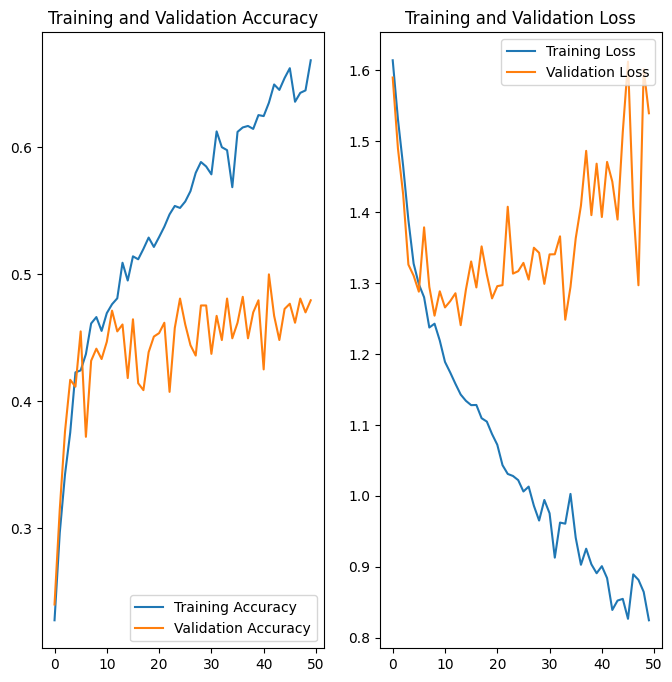

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
true_labels=label_batch
predicted_labels=predicted_ids

conf_matrix=confusion_matrix(true_labels,predicted_labels)

accuracy=accuracy_score(true_labels,predicted_labels)
precision=precision_score(true_labels,predicted_labels,average ='weighted')
recall=recall_score(true_labels,predicted_labels,average ='weighted')
f1=f1_score(true_labels,predicted_labels,average ='weighted')

print("Confusion Matrix:")
print(conf_matrix)
print("\nPerformance Metrics: ")
print("Accuracy: ",accuracy)
print("Recall: ",recall)
print("F1 Score: ",f1)



Confusion Matrix:
[[9 1 0 1 0]
 [0 2 0 0 0]
 [1 0 9 0 0]
 [1 0 0 5 0]
 [0 0 0 0 3]]

Performance Metrics: 
Accuracy:  0.875
Recall:  0.875
F1 Score:  0.8773026315789474


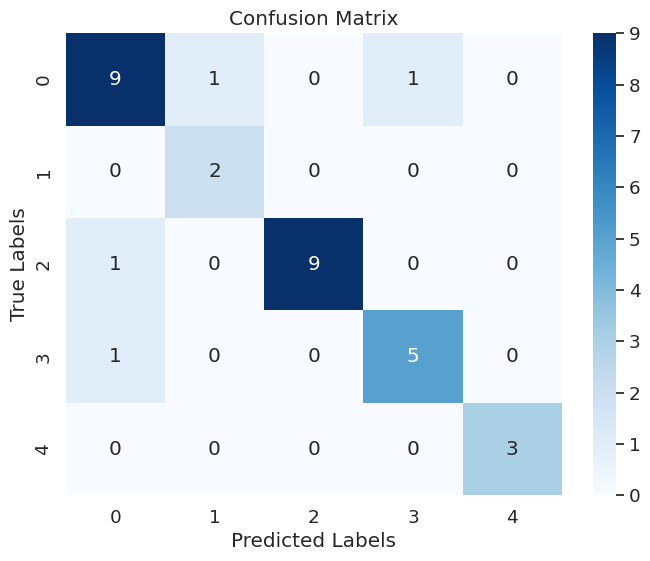

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues',cbar='False')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# 8. Model architecture - Score: 1 mark


Modify the architecture designed in section 4.1

1. by decreasing one layer
2. by increasing one layer

For example, if the architecture in 4.1 has 5 layers, then 8.1 should have 4 layers and 8.2 should have 6 layers.

Plot the comparison of the training and validation accuracy of the three architecures (4.1, 8.1 and 8.2)



In [ ]:
EPOCHS = 5
history = model.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

Epoch 1/5
81/81 [==============================] - 377s 4s/step - loss: 1.6226 - accuracy: 0.2234 - val_loss: 1.6089 - val_accuracy: 0.2166
Epoch 2/5
81/81 [==============================] - 382s 5s/step - loss: 1.6071 - accuracy: 0.2398 - val_loss: 1.6083 - val_accuracy: 0.2166
Epoch 3/5
81/81 [==============================] - 367s 4s/step - loss: 1.6032 - accuracy: 0.2515 - val_loss: 1.6145 - val_accuracy: 0.2166
Epoch 4/5
81/81 [==============================] - 328s 4s/step - loss: 1.6014 - accuracy: 0.2487 - val_loss: 1.6056 - val_accuracy: 0.2166
Epoch 5/5
81/81 [==============================] - 302s 4s/step - loss: 1.5836 - accuracy: 0.2491 - val_loss: 1.6183 - val_accuracy: 0.2166


In [ ]:
model1 = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224, 224, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),,
    tf.keras.layers.Dense(num_classes, activation='softmax')  # 5 classes in the Flowers dataset
])

model1.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


EPOCHS = 5
history1 = model1.fit(train_batches,
                    epochs=EPOCHS,validation_data=validation_batches)

In [ ]:
model2 = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224, 224, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # 5 classes in the Flowers dataset
])

model2.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


EPOCHS = 5
history2 = model2.fit(train_batches,
                    epochs=EPOCHS,validation_data=validation_batches)

# 9. Regularisations - Score: 1 mark

Modify the architecture designed in section 4.1

1. Dropout of ratio 0.25
2. Dropout of ratio 0.25 with L2 regulariser with factor 1e−04.

Plot the comparison of the training and validation accuracy of the three (4.1, 9.1 and 9.2)


In [ ]:
model3 = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224, 224, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),,
    tf.keras.layers.Dense(num_classes, activation='softmax')  # 5 classes in the Flowers dataset
])

model3.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


EPOCHS = 5
history1 = model3.fit(train_batches,
                    epochs=EPOCHS,validation_data=validation_batches)

In [ ]:
model4 = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224, 224, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),,
    tf.keras.layers.Dense(num_classes, activation='softmax')  # 5 classes in the Flowers dataset
])

model4.compile(
  optimizer='rmsprop',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


EPOCHS = 5
history4 = model4.fit(train_batches,
                    epochs=EPOCHS,validation_data=validation_batches)

# 10. Optimisers -Score: 1 mark

Modify the code written in section 5.2

1. RMSProp with your choice of hyper parameters
2. Adam with your choice of hyper parameters

Plot the comparison of the training and validation accuracy of the three (5.2, 10.1 and 10.2)


In [ ]:
model5 = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(224, 224, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # 5 classes in the Flowers dataset
])

model5.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


EPOCHS = 10
history5 = model5.fit(train_batches,
                    epochs=EPOCHS,
                    validation_data=validation_batches)

# 11. Conclusion - Score: 1 mark

Comparing the sections 4.1, 5.2, 8, 9, and 10, present your observations on which model or architecture or regualiser or optimiser perfomed better.

In [ ]:
##---------Type the code below this line------------------##
model_names = ['Model A', 'Model B', 'Model C']

# Define the validation and test accuracy results for each model
validation_accuracy_model_a = history.history['val_accuracy']  # Replace with actual validation accuracy values for Model A
test_accuracy_model_a = history.history['accuracy']  # Replace with actual test accuracy values for Model A

validation_accuracy_model_b = history1.history['val_accuracy'] # Replace with actual validation accuracy values for Model B
test_accuracy_model_b = history1.history['accuracy']  # Replace with actual test accuracy values for Model B

validation_accuracy_model_c = history2.history['val_accuracy']  # Replace with actual validation accuracy values for Model C
test_accuracy_model_c = history2.history['accuracy']  # Replace with actual test accuracy values for Model C

# Create a figure and axis
fig, ax = plt.subplots()

# Plot validation accuracy for each model
ax.plot(model_names, validation_accuracy_model_a, label='Model A Validation Accuracy', marker='o')
ax.plot(model_names, validation_accuracy_model_b, label='Model B Validation Accuracy', marker='o')
ax.plot(model_names, validation_accuracy_model_c, label='Model C Validation Accuracy', marker='o')

# Plot test accuracy for each model
ax.plot(model_names, test_accuracy_model_a, label='Model A Test Accuracy', marker='o')
ax.plot(model_names, test_accuracy_model_b, label='Model B Test Accuracy', marker='o')
ax.plot(model_names, test_accuracy_model_c, label='Model C Test Accuracy', marker='o')

# Add labels and title
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Validation and Test Accuracy Comparison for Different Models')

# Add a legend
ax.legend()

# Show the plot
plt.grid(True)
plt.show()

Conclusion :  Thus the best model from the above is the one with 7 layers, adam optimizer and dropout layer of 0.2...The accuracy of the said model is approx.90% for 70 epochs. The model can increase accuracy if no of epochs can be increased.